In [25]:
 import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter

In [26]:
train_CSV = "/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Training/training_labels.csv"
df = pd.read_csv(train_CSV)


In [90]:
train_image = "/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Training/training_words"

# **Exploratory Data Analysis(EDA)**

In [91]:
print(df.head)

<bound method NDFrame.head of          IMAGE MEDICINE_NAME            GENERIC_NAME
0        0.png         Aceta             Paracetamol
1        1.png         Aceta             Paracetamol
2        2.png         Aceta             Paracetamol
3        3.png         Aceta             Paracetamol
4        4.png         Aceta             Paracetamol
...        ...           ...                     ...
3115  3115.png       Zithrin  Azithromycin Dihydrate
3116  3116.png       Zithrin  Azithromycin Dihydrate
3117  3117.png       Zithrin  Azithromycin Dihydrate
3118  3118.png       Zithrin  Azithromycin Dihydrate
3119  3119.png       Zithrin  Azithromycin Dihydrate

[3120 rows x 3 columns]>


In [92]:
print(df["MEDICINE_NAME"].unique())

['Aceta' 'Ace' 'Alatrol' 'Amodis' 'Atrizin' 'Axodin' 'Azithrocin' 'Azyth'
 'Az' 'Bacaid' 'Backtone' 'Baclofen' 'Baclon' 'Bacmax' 'Beklo' 'Bicozin'
 'Canazole' 'Candinil' 'Cetisoft' 'Conaz' 'Dancel' 'Denixil' 'Diflu'
 'Dinafex' 'Disopan' 'Esonix' 'Esoral' 'Etizin' 'Exium' 'Fenadin'
 'Fexofast' 'Fexo' 'Filmet' 'Fixal' 'Flamyd' 'Flexibac' 'Flexilax'
 'Flugal' 'Ketocon' 'Ketoral' 'Ketotab' 'Ketozol' 'Leptic' 'Lucan-R'
 'Lumona' 'M-Kast' 'Maxima' 'Maxpro' 'Metro' 'Metsina' 'Monas' 'Montair'
 'Montene' 'Montex' 'Napa Extend' 'Napa' 'Nexcap' 'Nexum' 'Nidazyl'
 'Nizoder' 'Odmon' 'Omastin' 'Opton' 'Progut' 'Provair' 'Renova' 'Rhinil'
 'Ritch' 'Rivotril' 'Romycin' 'Rozith' 'Sergel' 'Tamen' 'Telfast'
 'Tridosil' 'Trilock' 'Vifas' 'Zithrin']


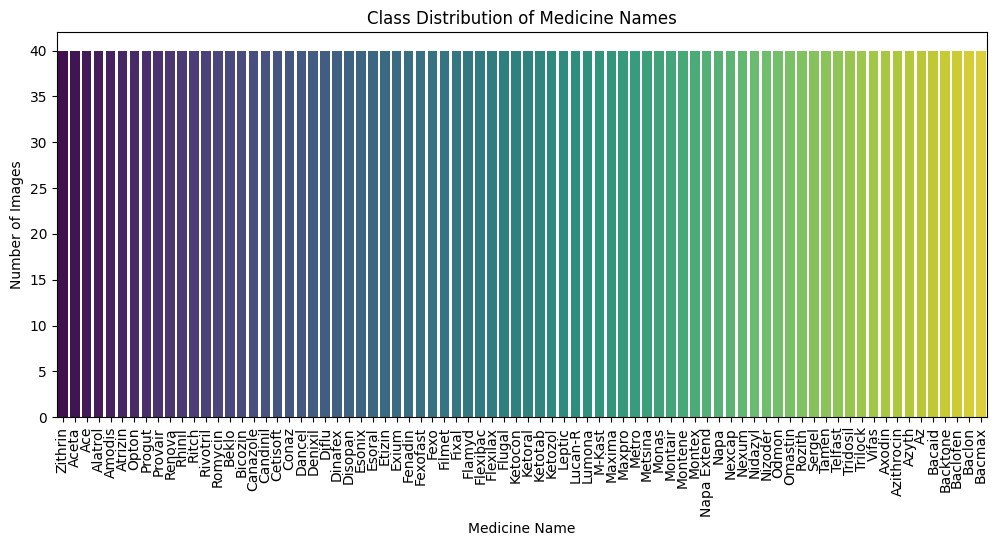

In [93]:
class_counts = df["MEDICINE_NAME"].value_counts()
plt.figure(figsize=(12, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Class Distribution of Medicine Names")
plt.xlabel("Medicine Name")
plt.ylabel("Number of Images")
plt.show()

In [94]:
img=cv2.imread("/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Training/training_words/0.png")

In [95]:
img.shape

(92, 238, 3)

In [96]:
img1=cv2.imread("/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Training/training_words/1.png")

In [97]:
img1.shape

(84, 207, 3)

In [98]:
def show_sample_images(df, train_image, num_samples=5):
    sample_data = df.sample(num_samples)  
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))

    for i, (idx, row) in enumerate(sample_data.iterrows()):
        img_path = os.path.join(train_image, row["IMAGE"])
        
        # Check if the image exists
        if not os.path.exists(img_path):
            print(f" Image not found: {img_path}")
            continue
        
        img = cv2.imread(img_path)

        if img is None:
            print(f" Failed to load: {img_path}")
            continue

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  

        axes[i].imshow(img)
        axes[i].set_title(row["MEDICINE_NAME"])
        axes[i].axis("off")

    plt.show()




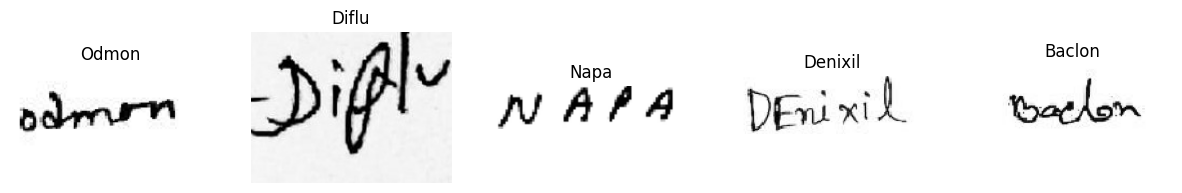

In [99]:
show_sample_images(df, train_image)


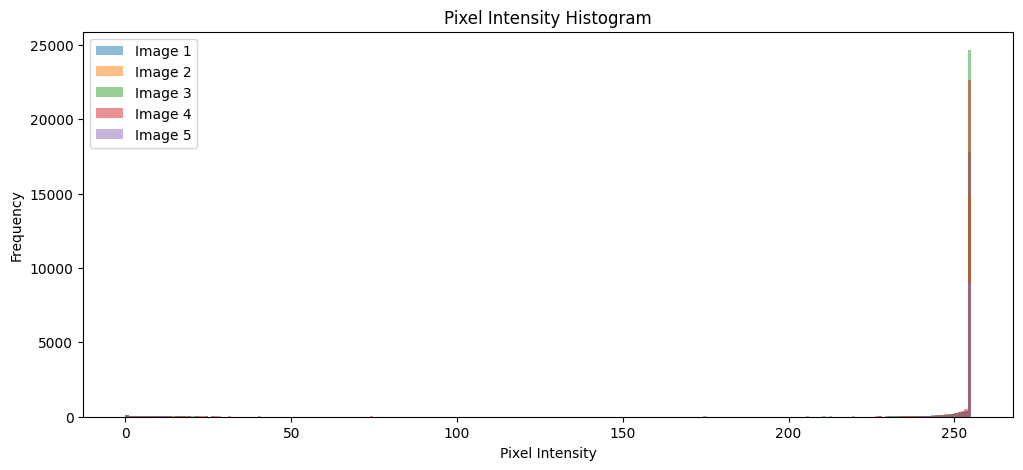

In [100]:
def plot_pixel_intensity(df, train_image, num_samples=5):
    plt.figure(figsize=(12, 5))

    for i in range(num_samples):
        img_path = os.path.join(train_image, df.iloc[i]["IMAGE"])
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  
        
        if img is not None:
            plt.hist(img.ravel(), bins=256, alpha=0.5, label=f"Image {i+1}")

    plt.legend()
    plt.title("Pixel Intensity Histogram")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()

plot_pixel_intensity(df, train_image)

# **PRE-PROCESSING**

In [101]:
train_output_folder = "/kaggle/working/train_preprocessed_images"
os.makedirs(train_output_folder, exist_ok=True)

In [102]:
validation_output_folder = "/kaggle/working/valdiation_preprocessed_images"
os.makedirs(validation_output_folder, exist_ok=True)

In [103]:
test_output_folder = "/kaggle/working/test_preprocessed_images"
os.makedirs(test_output_folder, exist_ok=True)

In [104]:
def show_image(title, img):
    plt.figure(figsize=(4, 4))
    plt.imshow(img, cmap="gray")
    plt.title(title)
    plt.axis("off")
    plt.show()


In [105]:
def preprocess_and_save_images(input_folder,output_folder, target_size=(128, 128)):
    image_files = [f for f in os.listdir(input_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]

    for i, image_file in enumerate(image_files):
        image_path = os.path.join(input_folder, image_file)
        img = cv2.imread(image_path)
        
        if img is None:
            print(f"Error loading image: {image_file}")
            continue

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        resized = cv2.resize(gray, target_size)

        _, binary = cv2.threshold(resized, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        save_path = os.path.join(output_folder, image_file)
        cv2.imwrite(save_path, binary)

        if i < 5:  
            show_image(f"Processed: {image_file}", binary)

    print(f"Processed {len(image_files)} images and saved to {output_folder}")

In [106]:
train_input_folder = "/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Training/training_words"

In [107]:
validation_input_folder = "/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Validation/validation_words"

In [108]:
test_input_folder = "/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Testing/testing_words"

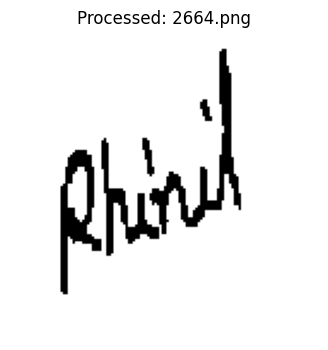

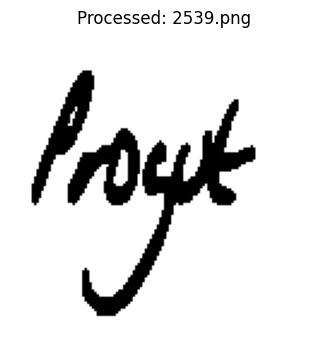

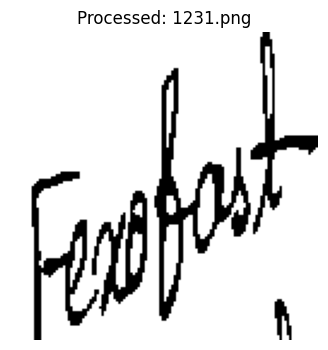

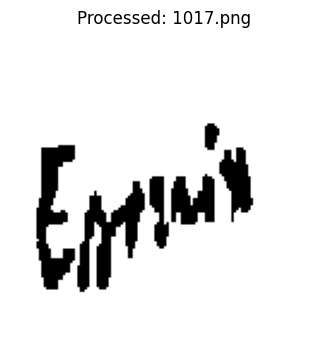

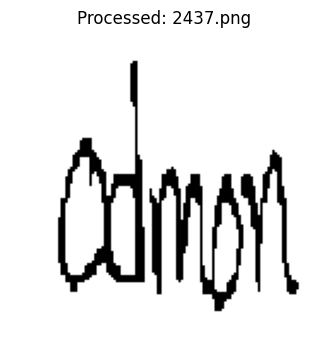

Processed 3120 images and saved to /kaggle/working/train_preprocessed_images


In [109]:
preprocess_and_save_images(train_input_folder,train_output_folder)


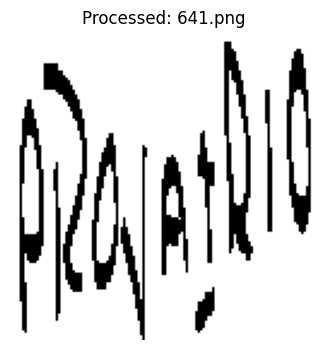

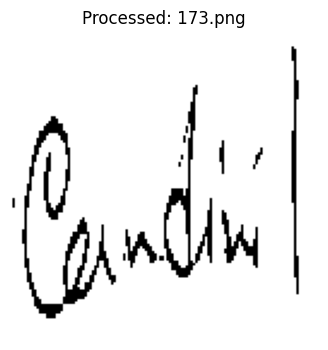

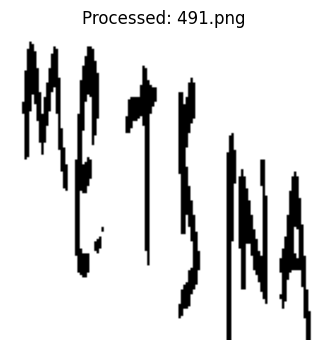

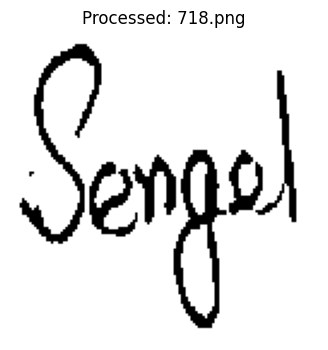

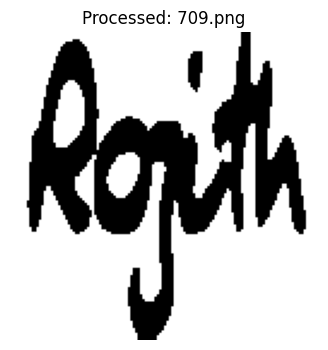

Processed 780 images and saved to /kaggle/working/valdiation_preprocessed_images


In [110]:
preprocess_and_save_images(validation_input_folder,validation_output_folder)


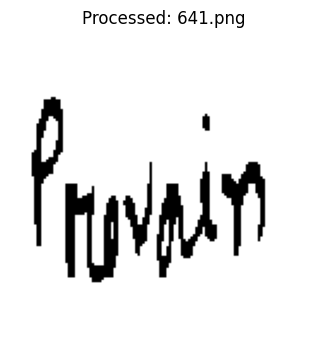

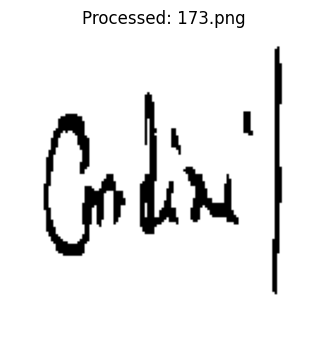

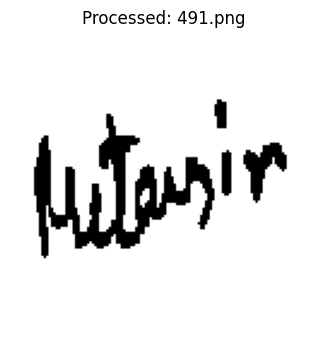

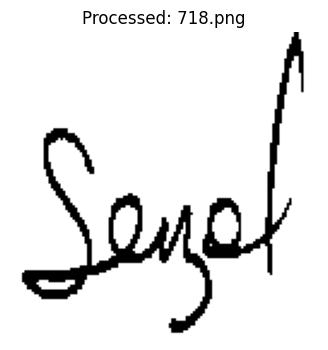

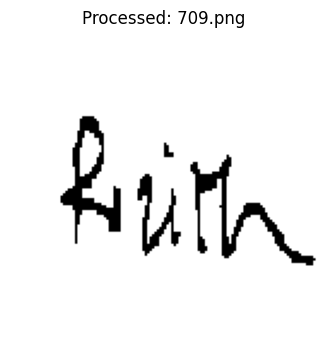

Processed 780 images and saved to /kaggle/working/test_preprocessed_images


In [111]:
preprocess_and_save_images(test_input_folder,test_output_folder)


# **Feature Extraction**

In [112]:
import os
import cv2
import numpy as np
import pandas as pd
from skimage.feature import hog
from sklearn.preprocessing import LabelEncoder
import joblib

In [113]:
hog_params = {
    "orientations": 9,
    "pixels_per_cell": (8, 8),
    "cells_per_block": (2, 2),
    "block_norm": "L2-Hys"
}

In [114]:
def extract_hog_features(image_path):
    """Extract HOG features from an image."""
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if img is None:
        print(f"Warning: Could not read {image_path}")
        return None

    # Apply HOG feature extraction
    features = hog(img, **hog_params)
    return features


In [115]:
def process_dataset(image_folder, csv_path):
    """Extract HOG features from images using labels from CSV file."""
    # Read CSV file
    df = pd.read_csv(csv_path)

    features_list = []
    labels_list = []

    for _, row in df.iterrows():
        image_name = row["IMAGE"]  # Assuming column name is "IMAGE"
        label = row["MEDICINE_NAME"]  # Assuming column name is "MEDICINE..."

        img_path = os.path.join(image_folder, image_name)

        # Extract HOG features
        features = extract_hog_features(img_path)
        if features is not None:
            features_list.append(features)
            labels_list.append(label)

    return np.array(features_list), labels_list

In [116]:
train_image_folder = "/kaggle/working/train_preprocessed_images"
tarin_csv_file = "/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Training/training_labels.csv"

In [117]:
X_train, y_train = process_dataset(train_image_folder, tarin_csv_file)

In [118]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

In [119]:
joblib.dump((X_train, y_train_encoded, label_encoder), "train_hog_features.pkl")


['train_hog_features.pkl']

In [120]:
print(f"Extracted Features Shape: {X_train.shape}")
print(f"Total Labels: {len(y_train_encoded)}")

Extracted Features Shape: (3120, 8100)
Total Labels: 3120


In [121]:
validation_image_folder = "/kaggle/working/valdiation_preprocessed_images"
validation_csv_file = "/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Validation/validation_labels.csv"

In [122]:
X_validation, y_validation = process_dataset(validation_image_folder, validation_csv_file)

In [123]:
label_encoder = LabelEncoder()
y_validation_encoded = label_encoder.fit_transform(y_validation)

In [124]:
joblib.dump((X_validation, y_validation_encoded, label_encoder), "validation_hog_features.pkl")


['validation_hog_features.pkl']

In [125]:
print(f"Extracted Features Shape: {X_validation.shape}")
print(f"Total Labels: {len(y_validation_encoded)}")

Extracted Features Shape: (780, 8100)
Total Labels: 780


In [126]:
test_image_folder = "/kaggle/working/test_preprocessed_images"
test_csv_file = "/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Testing/testing_labels.csv"

In [127]:
X_test, y_test = process_dataset(test_image_folder, test_csv_file)

In [128]:
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

In [129]:
joblib.dump((X_test, y_test_encoded, label_encoder), "test_hog_features.pkl")


['test_hog_features.pkl']

In [130]:
print(f"Extracted Features Shape: {X_test.shape}")
print(f"Total Labels: {len(y_test_encoded)}")

Extracted Features Shape: (780, 8100)
Total Labels: 780


# **MODEL TRAINING**

**Support Vector Machine (SVM)**

In [131]:
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score, classification_report


In [132]:
# X_train, y_train, label_encoder = joblib.load("/kaggle/working/train_hog_features.pkl")

In [133]:
# svm_model = SVC(kernel='linear', probability=True, random_state=42)
# svm_model.fit(X_train, y_train)

In [134]:
# joblib.dump(svm_model, "svm_hog_model.pkl")


In [135]:
# y_train_pred = svm_model.predict(X_train)


In [136]:
# train_accuracy = accuracy_score(y_train, y_train_pred)
# print(f"Training Accuracy: {train_accuracy:.4f}")

In [137]:
# print("Classification Report (Training Set):")
# print(classification_report(y_train, y_train_pred))

**Validation**

In [138]:
# X_val, y_val, _ = joblib.load("/kaggle/working/validation_hog_features.pkl")


In [139]:
# svm_model = joblib.load("/kaggle/working/svm_hog_model.pkl")

In [140]:
# y_val_pred = svm_model.predict(X_val)


In [141]:
# val_accuracy = accuracy_score(y_val, y_val_pred)
# print(f"Validation Accuracy: {val_accuracy:.4f}")


In [142]:
# print("Classification Report (Validation Set):")
# print(classification_report(y_val, y_val_pred))

**Testing**

In [143]:
# X_test, y_test, _ = joblib.load("/kaggle/working/test_hog_features.pkl")

In [144]:
# y_test_pred = svm_model.predict(X_test)

In [145]:
# test_accuracy = accuracy_score(y_test, y_test_pred)
# print(f"Test Accuracy: {test_accuracy:.4f}")


In [146]:
# print("Classification Report (Test Set):")
# print(classification_report(y_test, y_test_pred))


----------------------------------------------------------

In [147]:
# import joblib
# import cupy as cp  # GPU-accelerated numpy
# from cuml.svm import SVC  # GPU-accelerated SVM
# from sklearn.metrics import accuracy_score, classification_report
# from sklearn.model_selection import GridSearchCV

In [148]:
# X_train, y_train, label_encoder = joblib.load("/kaggle/working/train_hog_features.pkl")
# X_val, y_val, _ = joblib.load("/kaggle/working/validation_hog_features.pkl")


In [149]:
# X_train = cp.asarray(X_train)
# y_train = cp.asarray(y_train)
# X_val = cp.asarray(X_val)
# y_val = cp.asarray(y_val)


In [150]:
# param_grid = {'C': [0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf']}

In [151]:
# best_model = None
# best_params = None
# best_val_accuracy = 0

In [152]:
# for C in param_grid['C']:
#     for kernel in param_grid['kernel']:
#         print(f"Training SVM with C={C}, kernel={kernel} on GPU...")
        
#         svm_model = SVC(C=C, kernel=kernel, probability=True)
#         svm_model.fit(X_train, y_train)

#         # Predict on validation set
#         y_val_pred = svm_model.predict(X_val)
#         val_accuracy = accuracy_score(cp.asnumpy(y_val), cp.asnumpy(y_val_pred))

#         print(f"Validation Accuracy: {val_accuracy:.4f}")

#         if val_accuracy > best_val_accuracy:
#             best_val_accuracy = val_accuracy
#             best_model = svm_model
#             best_params = {'C': C, 'kernel': kernel}

# # Print best parameters
# print("✅ Best Parameters:", best_params)

In [153]:
# joblib.dump(best_model, "svm_hog_model_tuned.pkl")
# print("✅ Tuned Model saved as svm_hog_model_tuned.pkl")


In [154]:
# y_train_pred = best_model.predict(X_train)
# train_accuracy = accuracy_score(cp.asnumpy(y_train), cp.asnumpy(y_train_pred))
# print(f"Training Accuracy: {train_accuracy:.4f}")


In [155]:
# y_val_pred = best_model.predict(X_val)
# val_accuracy = accuracy_score(cp.asnumpy(y_val), cp.asnumpy(y_val_pred))
# print(f"Validation Accuracy: {val_accuracy:.4f}")

In [156]:
# print("Classification Report (Validation Set):")
# print(classification_report(cp.asnumpy(y_val), cp.asnumpy(y_val_pred)))

----------------XGB--------------------------------


In [157]:
# import joblib
# import xgboost as xgb
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import train_test_split


In [158]:
# X_train, y_train, label_encoder = joblib.load("/kaggle/working/train_hog_features.pkl")


In [159]:
# X_train, X_val_small, y_train, y_val_small = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [160]:
# xgb_model = xgb.XGBClassifier(
#     objective='multi:softmax',  # 'binary:logistic' for binary classification
#     num_class=len(label_encoder.classes_),  
#     tree_method='gpu_hist',  # Use GPU for faster training
#     predictor='gpu_predictor',  
#     eval_metric='mlogloss',  
#     random_state=42,

#     # 🛠️ **Regularization to Reduce Overfitting**
#     max_depth=6,  # Reduce tree depth (default is 6-10)
#     learning_rate=0.05,  # Lower learning rate for better generalization
#     n_estimators=500,  # More trees but use early stopping
#     subsample=0.8,  # Use only 80% of data for each tree (like dropout)
#     colsample_bytree=0.8,  # Use only 80% of features for each tree
#     reg_lambda=10,  # L2 regularization (higher reduces overfitting)
#     reg_alpha=5,  # L1 regularization (higher reduces complexity)
    
#     early_stopping_rounds=30  # Stop training if validation loss doesn't improve
# )


In [161]:
# xgb_model.fit(
#     X_train, y_train,
#     eval_set=[(X_val_small, y_val_small)],  
#     verbose=True
# )


In [162]:
# joblib.dump(xgb_model, "xgb_hog_model.pkl")

In [163]:
# y_train_pred = xgb_model.predict(X_train)
# train_accuracy = accuracy_score(y_train, y_train_pred)
# print(f"Training Accuracy: {train_accuracy:.4f}")

In [164]:
# X_val, y_val, _ = joblib.load("/kaggle/working/validation_hog_features.pkl")


In [165]:
# xgb_model = joblib.load("xgb_hog_model.pkl")


In [166]:
# y_val_pred = xgb_model.predict(X_val)
# val_accuracy = accuracy_score(y_val, y_val_pred)
# print(f"Validation Accuracy: {val_accuracy:.4f}")

# **CNN BASED MODEL**

In [167]:
import pandas as pd
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical


In [168]:
# Define base directory where images and CSV files are stored
base_dir = "/kaggle/working"  # Change this path if needed

# Image folders
train_img_dir = os.path.join(base_dir, "train_preprocessed_images") 
val_img_dir = os.path.join(base_dir, "valdiation_preprocessed_images")
test_img_dir = os.path.join(base_dir, "test_preprocessed_images")



In [169]:
# CSV files containing image names and labels
train_csv =("/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Training/training_labels.csv") 
val_csv = ("/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Validation/validation_labels.csv")
test_csv = ("/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Testing/testing_labels.csv") 


In [170]:
train_df = pd.read_csv(train_csv)
val_df = pd.read_csv(val_csv)
test_df = pd.read_csv(test_csv)

In [171]:
print("Train CSV Sample:\n", train_df.head())


Train CSV Sample:
    IMAGE MEDICINE_NAME GENERIC_NAME
0  0.png         Aceta  Paracetamol
1  1.png         Aceta  Paracetamol
2  2.png         Aceta  Paracetamol
3  3.png         Aceta  Paracetamol
4  4.png         Aceta  Paracetamol


In [172]:
print("Validation CSV Sample:\n", val_df.head())


Validation CSV Sample:
    IMAGE MEDICINE_NAME GENERIC_NAME
0  0.png         Aceta  Paracetamol
1  1.png         Aceta  Paracetamol
2  2.png         Aceta  Paracetamol
3  3.png         Aceta  Paracetamol
4  4.png         Aceta  Paracetamol


In [173]:
print("Test CSV Sample:\n", test_df.head())


Test CSV Sample:
    IMAGE MEDICINE_NAME GENERIC_NAME
0  0.png         Aceta  Paracetamol
1  1.png         Aceta  Paracetamol
2  2.png         Aceta  Paracetamol
3  3.png         Aceta  Paracetamol
4  4.png         Aceta  Paracetamol


In [174]:
# Function to get full image path
def get_image_path(image_name, folder):
    return os.path.join(folder, image_name)

# Add image paths to DataFrames
train_df["image_path"] = train_df["IMAGE"].apply(lambda x: get_image_path(x, train_img_dir))
val_df["image_path"] = val_df["IMAGE"].apply(lambda x: get_image_path(x, val_img_dir))
test_df["image_path"] = test_df["IMAGE"].apply(lambda x: get_image_path(x, test_img_dir))



In [175]:
print(train_df.head())


   IMAGE MEDICINE_NAME GENERIC_NAME  \
0  0.png         Aceta  Paracetamol   
1  1.png         Aceta  Paracetamol   
2  2.png         Aceta  Paracetamol   
3  3.png         Aceta  Paracetamol   
4  4.png         Aceta  Paracetamol   

                                        image_path  
0  /kaggle/working/train_preprocessed_images/0.png  
1  /kaggle/working/train_preprocessed_images/1.png  
2  /kaggle/working/train_preprocessed_images/2.png  
3  /kaggle/working/train_preprocessed_images/3.png  
4  /kaggle/working/train_preprocessed_images/4.png  


In [176]:
# Label encoding
label_encoder = LabelEncoder()

In [177]:
# Fit on training labels and transform labels into numeric values
train_df["label"] = label_encoder.fit_transform(train_df["MEDICINE_NAME"])
val_df["label"] = label_encoder.transform(val_df["MEDICINE_NAME"])
test_df["label"] = label_encoder.transform(test_df["MEDICINE_NAME"])


In [178]:
# Print class mappings
print("Class Mappings:", dict(zip(label_encoder.classes_, range(len(label_encoder.classes_)))))

Class Mappings: {'Ace': 0, 'Aceta': 1, 'Alatrol': 2, 'Amodis': 3, 'Atrizin': 4, 'Axodin': 5, 'Az': 6, 'Azithrocin': 7, 'Azyth': 8, 'Bacaid': 9, 'Backtone': 10, 'Baclofen': 11, 'Baclon': 12, 'Bacmax': 13, 'Beklo': 14, 'Bicozin': 15, 'Canazole': 16, 'Candinil': 17, 'Cetisoft': 18, 'Conaz': 19, 'Dancel': 20, 'Denixil': 21, 'Diflu': 22, 'Dinafex': 23, 'Disopan': 24, 'Esonix': 25, 'Esoral': 26, 'Etizin': 27, 'Exium': 28, 'Fenadin': 29, 'Fexo': 30, 'Fexofast': 31, 'Filmet': 32, 'Fixal': 33, 'Flamyd': 34, 'Flexibac': 35, 'Flexilax': 36, 'Flugal': 37, 'Ketocon': 38, 'Ketoral': 39, 'Ketotab': 40, 'Ketozol': 41, 'Leptic': 42, 'Lucan-R': 43, 'Lumona': 44, 'M-Kast': 45, 'Maxima': 46, 'Maxpro': 47, 'Metro': 48, 'Metsina': 49, 'Monas': 50, 'Montair': 51, 'Montene': 52, 'Montex': 53, 'Napa': 54, 'Napa Extend': 55, 'Nexcap': 56, 'Nexum': 57, 'Nidazyl': 58, 'Nizoder': 59, 'Odmon': 60, 'Omastin': 61, 'Opton': 62, 'Progut': 63, 'Provair': 64, 'Renova': 65, 'Rhinil': 66, 'Ritch': 67, 'Rivotril': 68, 'Romy

In [179]:
# Image size
IMG_SIZE = (64, 64) # 128,128

# Function to load images
def load_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
    if image is None:
        print(f"Error loading image: {image_path}")
        return np.zeros((IMG_SIZE[0], IMG_SIZE[1]))  # Return blank image if error
    image = image / 255.0  # Normalize to [0,1]
    return image

In [180]:
# Load train images
train_images = np.array([load_image(img) for img in train_df["image_path"]]).reshape(-1, 128, 128, 1)
train_labels = np.array(train_df["label"])

In [181]:
# Load validation images
val_images = np.array([load_image(img) for img in val_df["image_path"]]).reshape(-1, 128, 128, 1)
val_labels = np.array(val_df["label"])

In [182]:
# Load test images
test_images = np.array([load_image(img) for img in test_df["image_path"]]).reshape(-1, 128, 128, 1)
test_labels = np.array(test_df["label"])

In [183]:
# Convert labels to categorical (one-hot encoding)
train_labels = to_categorical(train_labels, num_classes=len(label_encoder.classes_))
val_labels = to_categorical(val_labels, num_classes=len(label_encoder.classes_))
test_labels = to_categorical(test_labels, num_classes=len(label_encoder.classes_))

In [184]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LeakyReLU

# Create CNN model
model = Sequential([
    Conv2D(32, (3,3), input_shape=(128, 128, 1)),  # Grayscale input
    LeakyReLU(alpha=0.1),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3)),
    LeakyReLU(alpha=0.1),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3)),
    LeakyReLU(alpha=0.1),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(128),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),
    Dense(len(label_encoder.classes_), activation="softmax")  # Output layer
])

# Compile model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)                   │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_33 (LeakyReLU)           │ (None, 126, 126, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_34 (LeakyReLU)           │ (None, 61, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_35 (LeakyReLU)           │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_36 (LeakyReLU)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 78)                  │          10,062 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,314,126 (12.64 MB)

 Trainable params: 3,314,126 (12.64 MB)

 Non-trainable params: 0 (0.00 B)

In [185]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Create an ImageDataGenerator for augmentation
# datagen = ImageDataGenerator(
#     rotation_range=25,       # Rotate images up to 15 degrees
#     width_shift_range=0.1,   # Shift width by 10%
#     height_shift_range=0.1,  # Shift height by 10%
#     zoom_range=0.1,          # Zoom images up to 10%
#     horizontal_flip=True,    # Flip images horizontally
# )

# # Fit the generator to training data
# datagen.fit(train_images)





In [191]:
history = model.fit(
    datagen.flow(train_images, train_labels, batch_size=32),  # Use augmented data
    validation_data=(val_images, val_labels),
    epochs=50,  # Increase epochs after adding augmentation
    verbose=1
)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.0165 - loss: 4.3559 - val_accuracy: 0.0179 - val_loss: 4.3456
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.0089 - loss: 4.3585 - val_accuracy: 0.0308 - val_loss: 4.2145
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.0171 - loss: 4.3509 - val_accuracy: 0.0282 - val_loss: 4.2662
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.0152 - loss: 4.3414 - val_accuracy: 0.0321 - val_loss: 4.1797
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.0096 - loss: 4.3236 - val_accuracy: 0.0192 - val_loss: 4.1431
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.0115 - loss: 4.3141 - val_accuracy: 0.0321 - val_loss: 4.2105
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.0116 - loss: 4.3312 - val_accuracy: 0.0295 - val_loss: 4.1059
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.0146 - loss: 4.3343 - val_accuracy: 0.0410 - v

In [192]:
model.save("/kaggle/working/cnn_model.h5")

In [193]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc:.4f}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1326 - loss: 3.7251
Test Accuracy: 0.0987


In [194]:
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [195]:
print("Predicted:", predicted_labels[:10])
print("Actual:", true_labels[:10])

Predicted: [27 27 66 27 66 38  1 27 66 66]
Actual: [1 1 1 1 1 1 1 1 1 1]


**MobileNetV2**

In [3]:
 import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter

EDA should remain same 

Data PreProcessing

In [4]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
# Define base directory where images and CSV files are stored
base_dir = "/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset"  

# Image folders
train_img_dir = os.path.join(base_dir, "Training/training_words") 
val_img_dir = os.path.join(base_dir, "Validation/validation_words")
test_img_dir = os.path.join(base_dir, "Testing/testing_words")



In [8]:
tarin_csv = "/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Training/training_labels.csv"
val_csv = "/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Validation/validation_labels.csv"
test_csv = "/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Testing/testing_labels.csv"

In [9]:
train_df = pd.read_csv(train_csv)
val_df = pd.read_csv(val_csv)
test_df = pd.read_csv(test_csv)

In [10]:
# CSV files containing image names and labels
train_csv =("/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Training/training_labels.csv") 
val_csv = ("/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Validation/validation_labels.csv")
test_csv = ("/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Testing/testing_labels.csv") 


In [11]:
# Function to get full image path
def get_image_path(image_name, folder):
    return os.path.join(folder, image_name)

# Add image paths to DataFrames
train_df["image_path"] = train_df["IMAGE"].apply(lambda x: get_image_path(x, train_img_dir))
val_df["image_path"] = val_df["IMAGE"].apply(lambda x: get_image_path(x, val_img_dir))
test_df["image_path"] = test_df["IMAGE"].apply(lambda x: get_image_path(x, test_img_dir))



In [15]:
print(train_df.head())

   IMAGE MEDICINE_NAME GENERIC_NAME  \
0  0.png         Aceta  Paracetamol   
1  1.png         Aceta  Paracetamol   
2  2.png         Aceta  Paracetamol   
3  3.png         Aceta  Paracetamol   
4  4.png         Aceta  Paracetamol   

                                          image_path  
0  /kaggle/input/doctors-handwritten-prescription...  
1  /kaggle/input/doctors-handwritten-prescription...  
2  /kaggle/input/doctors-handwritten-prescription...  
3  /kaggle/input/doctors-handwritten-prescription...  
4  /kaggle/input/doctors-handwritten-prescription...  


In [16]:
print(val_df.head())

   IMAGE MEDICINE_NAME GENERIC_NAME  \
0  0.png         Aceta  Paracetamol   
1  1.png         Aceta  Paracetamol   
2  2.png         Aceta  Paracetamol   
3  3.png         Aceta  Paracetamol   
4  4.png         Aceta  Paracetamol   

                                          image_path  
0  /kaggle/input/doctors-handwritten-prescription...  
1  /kaggle/input/doctors-handwritten-prescription...  
2  /kaggle/input/doctors-handwritten-prescription...  
3  /kaggle/input/doctors-handwritten-prescription...  
4  /kaggle/input/doctors-handwritten-prescription...  


In [17]:
print(test_df.head())

   IMAGE MEDICINE_NAME GENERIC_NAME  \
0  0.png         Aceta  Paracetamol   
1  1.png         Aceta  Paracetamol   
2  2.png         Aceta  Paracetamol   
3  3.png         Aceta  Paracetamol   
4  4.png         Aceta  Paracetamol   

                                          image_path  
0  /kaggle/input/doctors-handwritten-prescription...  
1  /kaggle/input/doctors-handwritten-prescription...  
2  /kaggle/input/doctors-handwritten-prescription...  
3  /kaggle/input/doctors-handwritten-prescription...  
4  /kaggle/input/doctors-handwritten-prescription...  


In [19]:
#for training data with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,               # Normalize pixel values
    rotation_range=25,            # Rotate images up to 25 degrees
    width_shift_range=0.1,        # Shift width by 10%
    height_shift_range=0.1,       # Shift height by 10%
    zoom_range=0.2,               # Zoom in/out by 20%
    horizontal_flip=True          # Flip images horizontally
)

In [20]:
# Image data generator for validation and test data (without augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

In [27]:
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col="image_path",
    y_col="MEDICINE_NAME",
    target_size=(224, 224),   # Adjust to your model's input size
    batch_size=32,
    class_mode="categorical",
    shuffle=True
)

Found 3120 validated image filenames belonging to 78 classes.


In [39]:
val_generator = test_datagen.flow_from_dataframe(
    val_df,
    x_col="image_path",
    y_col="MEDICINE_NAME",
    target_size=(224, 224),   # Adjust to your model's input size
    batch_size=32,
    class_mode="categorical",
    shuffle=True
)

Found 780 validated image filenames belonging to 78 classes.


In [40]:
test_generator = test_datagen.flow_from_dataframe(
    test_df,
    x_col="image_path",
    y_col="MEDICINE_NAME",
    target_size=(224, 224),   # Adjust to your model's input size
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

Found 780 validated image filenames belonging to 78 classes.


In [41]:
num_classes = len(train_generator.class_indices)


In [42]:
print(num_classes)

78


Build and train Model

In [35]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2, EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import os

In [33]:
# Function to build and compile model
def build_model(base_model):
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dense(256, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

MobileNetV2 Model

In [36]:
mobilenet_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
mobilenet_base.trainable = False
mobilenet_model = build_model(mobilenet_base)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [43]:
steps_per_epoch = len(train_generator)
validation_steps = len(val_generator)

In [45]:
print("Training MobileNetV2...")
mobilenet_history = mobilenet_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps
)


Training MobileNetV2...
Epoch 1/10
97/98 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - accuracy: 0.4377 - loss: 2.3900

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


98/98 ━━━━━━━━━━━━━━━━━━━━ 35s 335ms/step - accuracy: 0.4379 - loss: 2.3893 - val_accuracy: 0.3782 - val_loss: 2.5568
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 186us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


98/98 ━━━━━━━━━━━━━━━━━━━━ 34s 318ms/step - accuracy: 0.4675 - loss: 2.2453 - val_accuracy: 0.3679 - val_loss: 2.4749
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 131us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 34s 324ms/step - accuracy: 0.4940 - loss: 2.0832 - val_accuracy: 0.4538 - val_loss: 2.3200
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 131us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 34s 319ms/step - accuracy: 0.5490 - loss: 1.9033 - val_accuracy: 0.4487 - val_loss: 2.2650
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 184us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 34s 319ms/step - accuracy: 0.5722 - loss: 1.7501 - val_accuracy: 0.4782 - val_loss: 2.1657
Epoch 10/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 262us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


In [46]:
mobilenet_model.evaluate(test_generator)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.2734 - loss: 3.0267


[3.328831672668457, 0.23589743673801422]

EfficientNetB0 Model


In [47]:
efficientnet_base = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
efficientnet_base.trainable = False
efficientnet_model = build_model(efficientnet_base)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [48]:
efficientnet_history = efficientnet_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator)
)


Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 71s 517ms/step - accuracy: 0.0180 - loss: 4.3596 - val_accuracy: 0.0128 - val_loss: 4.3569
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 34s 321ms/step - accuracy: 0.0118 - loss: 4.3585 - val_accuracy: 0.0128 - val_loss: 4.3569
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 209us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 34s 321ms/step - accuracy: 0.0103 - loss: 4.3582 - val_accuracy: 0.0128 - val_loss: 4.3568
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 178us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 33s 314ms/step - accuracy: 0.0089 - loss: 4.3575 - val_accuracy: 0.0128 - val_loss: 4.3567
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 184us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 34s 321ms/step - accuracy: 0.0047 - loss: 4.3576 - val_accuracy: 0.012

In [49]:
print("Evaluating EfficientNetB0 on test data...")
efficientnet_model.evaluate(test_generator)

Evaluating EfficientNetB0 on test data...
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.0213 - loss: 4.3564


[4.356718063354492, 0.012820512987673283]